In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
Customers = pd.read_excel('C:\\Users\\hp\\OneDrive\\Desktop\\UNIFIED PROJECTS\\Budget Sales data\\AdventureWorks_Database.xlsx',
                              'Customers',
                              dtype={'CustomerKey':str},
                              parse_dates=['BirthDate','DateFirstPurchase']
                              )

In [4]:
Product = pd.read_excel('C:\\Users\\hp\\OneDrive\\Desktop\\UNIFIED PROJECTS\\Budget Sales data\\AdventureWorks_Database.xlsx',
                              'Product',
                              dtype={'ProductKey':str},
                              parse_dates=['StartDate']
                              )

In [5]:
Sales = pd.read_excel('C:\\Users\\hp\\OneDrive\\Desktop\\UNIFIED PROJECTS\\Budget Sales data\\AdventureWorks_Database.xlsx',
                              'Sales',
                              dtype={'ProductKey':str,
                                     'CustomerKey':str,
                                     'PromotionKey':str,
                                     'SalesTerritoryKey':str},
                              parse_dates=['OrderDate', 'ShipDate']
                              )
Sales['DateKey'] = Sales['OrderDate'].astype(str)

In [6]:
Territory = pd.read_excel('C:\\Users\\hp\\OneDrive\\Desktop\\UNIFIED PROJECTS\\Budget Sales data\\AdventureWorks_Database.xlsx',
                              'Territory',
                              dtype={'SalesTerritoryKey':str}
                              )

In [7]:
temp_data = pd.merge(Sales, Product, on='ProductKey', how='inner')
df = pd.merge(temp_data, Customers, on='CustomerKey', how='inner')
df = pd.merge(df, Territory, on='SalesTerritoryKey', how='inner')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58189 entries, 0 to 58188
Data columns (total 58 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  object        
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  object        
 4   PromotionKey          58189 non-null  object        
 5   SalesTerritoryKey     58189 non-null  object        
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  Unnamed: 13     

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SalesOrderLineNumber,58189.0,1.887453,1.018829,1.0000,1.0000,2.0000,2.0000,8.0000
OrderQuantity,58189.0,1.569386,1.047532,1.0000,1.0000,1.0000,2.0000,4.0000
UnitPrice,58189.0,413.888218,833.052938,0.5725,4.9900,24.4900,269.9950,3578.2700
TotalProductCost,58189.0,296.539185,560.171436,0.8565,3.3623,12.1924,343.6496,2171.2942
SalesAmount,58189.0,503.666270,941.462817,2.2900,8.9900,32.6000,539.9900,3578.2700
TaxAmt,58189.0,40.293303,75.317027,0.1832,0.7192,2.6080,43.1992,286.2616
Unnamed: 13,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 14,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 15,58189.0,503.666269,941.462815,2.2900,8.9900,32.6000,539.9900,3578.2700
Unnamed: 16,58189.0,0.000001,0.000014,0.0000,0.0000,0.0000,0.0000,0.0003


Standard deviation is square root of variance.


In [10]:
df.duplicated().sum()

0

In [11]:
def missing_pct(df):
    # Calculate missing value and their percentage for each column
    missing_count_percent = df.isnull().sum() * 100 / df.shape[0]
    df_missing_count_percent = pd.DataFrame(missing_count_percent).round(2)
    df_missing_count_percent = df_missing_count_percent.reset_index().rename(
                    columns={
                            'index':'Column',
                            0:'Missing_Percentage (%)'
                    }
                )
    df_missing_value = df.isnull().sum()
    df_missing_value = df_missing_value.reset_index().rename(
                    columns={
                            'index':'Column',
                            0:'Missing_value_count'
                    }
                )
    # Sort the data frame
    #df_missing = df_missing.sort_values('Missing_Percentage (%)', ascending=False)
    Final = df_missing_value.merge(df_missing_count_percent, how = 'inner', left_on = 'Column', right_on = 'Column')
    Final = Final.sort_values(by = 'Missing_Percentage (%)',ascending = False)
    return Final

In [12]:
missing_pct(df)

,Column,Missing_value_count,Missing_Percentage (%)
22,Unnamed: 22,58189,100.00
19,Unnamed: 19,58189,100.00
14,Unnamed: 14,58189,100.00
13,Unnamed: 13,58189,100.00
17,Unnamed: 17,58189,100.00
30,Color,27442,47.16
0,ProductKey,0,0.00
42,MaritalStatus,0,0.00
41,BirthDate,0,0.00
39,LastName,0,0.00


In [13]:
df= df.dropna(axis=1)

In [14]:
# Extracting Year from OrderDate
df['sale_year'] = df['OrderDate'].dt.year

# Extracting Month from OrderDate
df['sale_month'] = df['OrderDate'].dt.month

# Extracting day from OrderDate
df['sale_day'] = df['OrderDate'].dt.day

# Extracting dayofweek from OrderDate
df['sale_week'] = df['OrderDate'].dt.dayofweek

# Extracting day_name from OrderDate
df['sale_day_name'] = df['OrderDate'].dt.day_name()

# Extracting Month Year from OrderDate
df['year_month'] = df['OrderDate'].apply(lambda x:x.strftime('%Y-%m'))

# Calculate Total Invoice Amount
df['total_Invoice_amount'] = df['SalesAmount'] + df['TaxAmt']

# Considering only salesamount and total_sales_amount to calculate profit 
df['profit'] = (df['UnitPrice']*df['OrderQuantity']) - df['TotalProductCost']

# Removing extra character from the string
df['ProductName'] = df['ProductName'].str.replace(',','-')

# Calculate Age
df['Age'] = df['OrderDate'].dt.year - df['BirthDate'].dt.year

In [15]:
df['Category'].unique().tolist()
df['SubCategory'].unique().tolist()

['Road Bikes',
 'Mountain Bikes',
 'Bottles and Cages',
 'Gloves',
 'Tires and Tubes',
 'Helmets',
 'Touring Bikes',
 'Jerseys',
 'Cleaners',
 'Caps',
 'Hydration Packs',
 'Socks',
 'Fenders',
 'Vests',
 'Bike Racks',
 'Bike Stands',
 'Shorts']

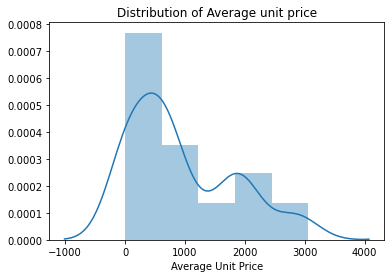

In [16]:
Avg_unit_price = df.groupby(['ProductKey'])['UnitPrice'].mean()
ax = sns.distplot(Avg_unit_price, kde=True, hist=True)
ax.set(title='Distribution of Average unit price',
       xlabel='Average Unit Price');

Unit product price is maximum between $0 $ to1000.

In [17]:
n_orders = df.groupby(['CustomerKey'])['SalesOrderNumber'].nunique()
multi_orders_perc = np.sum(n_orders > 1)/df['CustomerKey'].nunique()
print(f"{100*multi_orders_perc:.2f}% of customers ordered more than once.")

36.97% of customers ordered more than once.


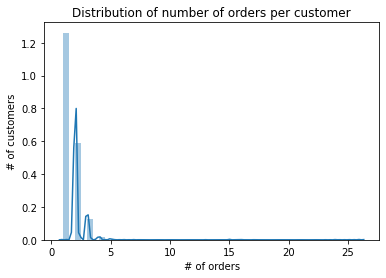

In [18]:
ax = sns.distplot(n_orders)
ax.set(title='Distribution of number of orders per customer',
       xlabel='# of orders',
       ylabel='# of customers');

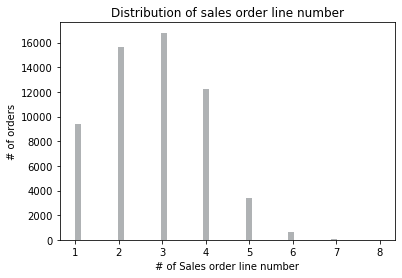

In [19]:
n_salesordernumber = df.groupby(['SalesOrderNumber'])['SalesOrderLineNumber'].transform('max')
ax = sns.distplot(n_salesordernumber, kde=False, color='#374045')
ax.set(title='Distribution of sales order line number',
       xlabel='# of Sales order line number',
       ylabel='# of orders');

Three to two products are ordered in a single order most of the time.

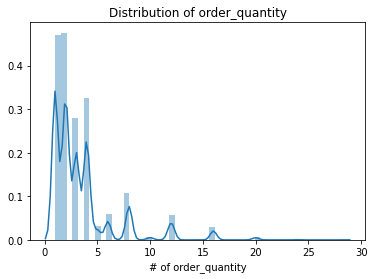

In [20]:
n_order_quantity = df.groupby(['SalesOrderNumber'])['OrderQuantity'].sum()
ax = sns.distplot(n_order_quantity, kde=True, hist=True)
ax.set(title='Distribution of order_quantity',
       xlabel='# of order_quantity',
       );

Maximum quantity ordered for a product is below 5

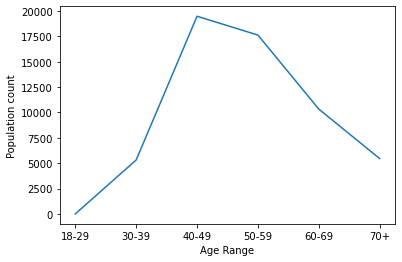

In [21]:

bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['agerange'] = pd.cut(df.Age, bins, labels = labels,include_lowest = True)

age_distribution = df['agerange'].value_counts().to_frame().reset_index()

age_distribution.columns = ['Age Range','Population count']

sns.lineplot( x='Age Range', y='Population count',data=age_distribution)
plt.show()

A sizable portion of the clientele is made up of people between the ages of 40 and 59.

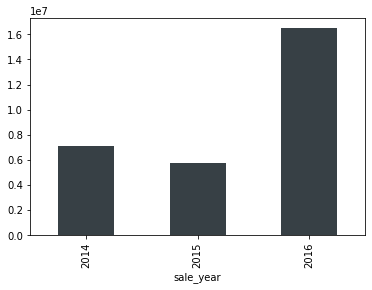

In [22]:
df.groupby('sale_year')['SalesAmount'].sum().plot(kind='bar', color='#374045');

The year 2016 saw an exponential surge in sales.

In [23]:
top_selling_product = df.groupby(['Category', 'SubCategory', 'ProductName'])['OrderQuantity'].sum().nlargest(5).to_frame()
top_selling_product

OrderQuantity
Category    SubCategory       ProductName                         
Accessories Bottles and Cages Water Bottle - 30 oz.           6370
            Tires and Tubes   Patch Kit/8 Patches             4705
                              Mountain Tire Tube              4551
                              Road Tire Tube                  3544
            Helmets           Sport-100 Helmet- Red           3398

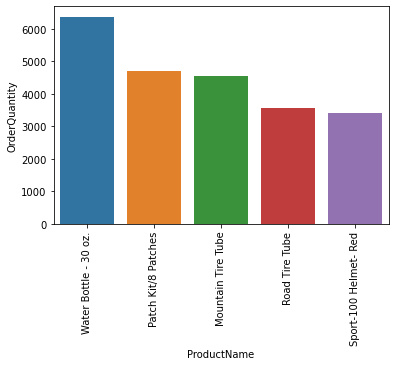

In [24]:
top_selling_product.reset_index(inplace=True)
sns.barplot(x='ProductName', y='OrderQuantity',data=top_selling_product)
plt.xticks(rotation=90)
plt.show()

In [43]:
cat_subcat_qty = df.groupby(['sale_year','Category', 'SubCategory'])['OrderQuantity'].sum().to_frame()
cat_subcat_qty = cat_subcat_qty.sort_values(['sale_year', 'Category'], ascending=True)
cat_subcat_qty.style.bar(subset=['OrderQuantity'])

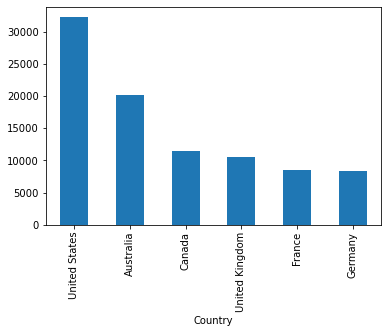

In [26]:
country_qty_sales = df.groupby('Country')['OrderQuantity'].sum().sort_values(ascending=False)
country_qty_sales.plot(kind='bar');

High quantity of products is ordered from Australia and United States

In [27]:
cat_subcat_profit = df.groupby(['sale_year','Category', 'SubCategory'])['profit'].sum().to_frame()

#Sorting the results
cat_subcat_profit = cat_subcat_profit.sort_values(['sale_year', 'Category'], ascending=True)
cat_subcat_profit.style.bar(subset=['profit'])

Major Profit is contributed by the Bike Category

In [28]:
df.groupby(['Category', 'SubCategory','ProductName'])['profit'].sum().nsmallest(10).to_frame()

profit
Category    SubCategory     ProductName                              
Clothing    Socks           Racing Socks- L                 1474.4574
                            Racing Socks- M                 1581.3837
Accessories Cleaners        Bike Wash - Dissolver           4299.8688
            Tires and Tubes Patch Kit/8 Patches             4314.8350
Clothing    Caps            AWC Logo Cap                    4331.8315
Accessories Tires and Tubes Touring Tire Tube               4363.8089
Clothing    Jerseys         Long-Sleeve Logo Jersey- XL     4495.6007
                            Short-Sleeve Classic Jersey- L  4544.8782
                            Long-Sleeve Logo Jersey- S      4610.5777
                            Short-Sleeve Classic Jersey- M  4793.2322

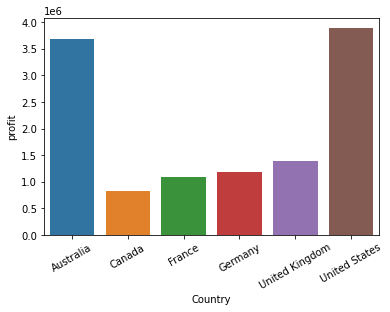

In [29]:
country_sales = pd.DataFrame(df.groupby('Country').sum()[['SalesAmount', 'profit']])
country_sales.reset_index(inplace=True)

sns.barplot(data=country_sales, x='Country', y='profit')
plt.xticks(rotation=30)
plt.show()

High volume of profit is earned from Australia and United States

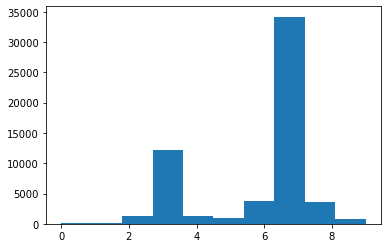

In [32]:
df['OrderreadyDate'] = df['OrderDate'] + pd.to_timedelta(df['DaysToManufacture'], unit='D')

# Check the delay between order shipment date and order ready to supply
df['shipping_efficiency'] = (df['ShipDate'] - df['OrderreadyDate']).dt.days

plt.hist(data=df, x="shipping_efficiency",)
plt.show()

The average order has a gap of 7 days between the day the order is ready for export from the factory and the date it was shipped.
Management must work to reduce this gap toward 3 days.

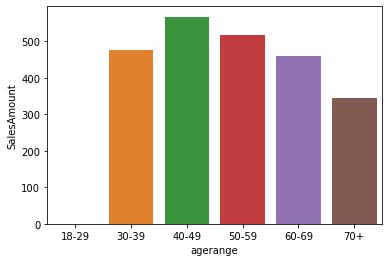

In [33]:
dj = df.groupby('agerange')['SalesAmount'].mean().to_frame().dropna()
dj.reset_index(inplace=True)
sns.barplot(data=dj, x='agerange', y='SalesAmount')
plt.show()

40-49 age group has produced most revenue.

In [34]:
def create_bins(lower_bound, width, quantity):
    """ create_bins returns an equal-width (distance) partitioning. 
        It returns an ascending list of tuples, representing the intervals.
        A tuple bins[i], i.e. (bins[i][0], bins[i][1])  with i > 0 
        and i < quantity, satisfies the following conditions:
            (1) bins[i][0] + width == bins[i][1]
            (2) bins[i-1][0] + width == bins[i][0] and
                bins[i-1][1] + width == bins[i][1]
    """
    

    bins = []
    for low in range(lower_bound, 
                     lower_bound + quantity*width + 1, width):
        bins.append((low, low+width))
    return bins

In [35]:
bins = create_bins(lower_bound=10000,
                   width=30000,
                   quantity=5)
bins2 = pd.IntervalIndex.from_tuples(bins)
df['salary_range'] = pd.cut(df['YearlyIncome'], bins2)

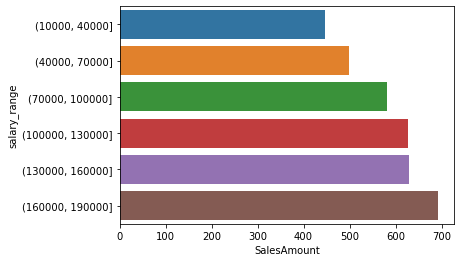

In [36]:
df_4 = df.groupby('salary_range')['SalesAmount'].mean().to_frame()
df_4.reset_index(inplace=True)
sns.barplot(x="SalesAmount", y="salary_range", data=df_4)
plt.show()

High salary range leads to increase in purchase

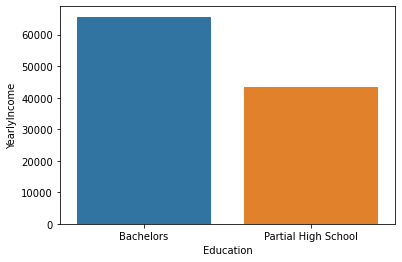

In [39]:
df_6 = df[(df['Education']=='Partial High School')|(df['Education']=='Bachelors')].groupby('Education')['YearlyIncome'].mean().to_frame()
df_6.reset_index(inplace=True)
sns.barplot(data=df_6, x='Education', y='YearlyIncome')
plt.show()



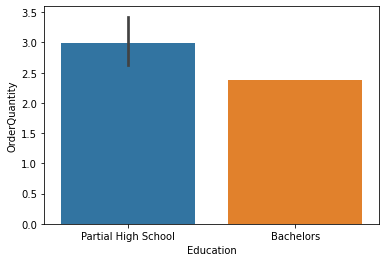

In [41]:
df_7 = df[(df['Education']=='Partial High School')|(df['Education']=='Bachelors')]
df_7 = df_7.groupby(['Education','ProductName'])['OrderQuantity'].mean().to_frame().sort_values('OrderQuantity', ascending=False)[:10]
df_7.reset_index(inplace=True)
sns.barplot(data=df_7, x="Education",
             y="OrderQuantity")
plt.show()

Customers with a high school diploma and modest annual income buy more products than people with bachelor's degrees.
